In [1]:
import numpy as np
import pandas as pd
import pulse2percept as p2p
import p2pspatial

%matplotlib inline
import matplotlib.pyplot as plt

/home/mbeyeler/anaconda3/lib/python3.5/site-packages/skvideo/__init__.py:356: UserWarning: avconv/avprobe not found in path: 
  warnings.warn("avconv/avprobe not found in path: " + str(path), UserWarning)
2018-03-25 14:44:45,988 [pulse2percept] [INFO] Welcome to pulse2percept


In [2]:
X = pd.DataFrame([{'electrode': 'A7'}])

In [3]:
implant_x = -1000
implant_y = 0
implant_rot = np.deg2rad(-30)
sim = p2p.Simulation(p2p.implants.ArgusII(x_center=implant_x, y_center=implant_y,
                                          rot=implant_rot))

In [11]:
p2p.retina.ret2dva(4000), p2p.retina.ret2dva(y_range)

(14.789459200000001, array([-9.53523526,  9.53523526]))

In [4]:
x_range = (-4500, 2500)
y_range = (-2600, 2600)
sim.set_optic_fiber_layer(sampling=1000, x_range=x_range, y_range=y_range,
                          rho_range=(2, 40), n_axons=101)

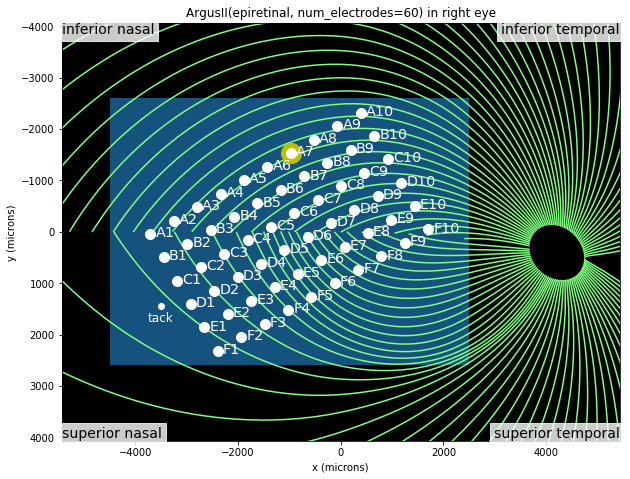

In [9]:
sim.plot_fundus(stim={X.loc[0, 'electrode']: None}, upside_down=True)
plt.savefig('fig6-axon-map-model.eps')

In [6]:
!rm axons.pickle
model = p2pspatial.models.ModelC(implant_x=implant_x, implant_y=implant_y,
                                 implant_rot=implant_rot,
                                 img_thresh=1/np.sqrt(np.e),
                                 n_axons=501, n_ax_segments=301, xystep=0.1,
                                 xrange=tuple(p2p.retina.ret2dva(x_range)),
                                 yrange=tuple(p2p.retina.ret2dva(y_range)))
model

ModelC(ax_segments_range=(3, 50), axlambda=100, axons_range=(-180, 180),
    engine='joblib', greater_is_better=False,
    img_thresh=0.60653065971263342, implant_rot=-0.52359877559829882,
    implant_type=<class 'pulse2percept.implants.ArgusII'>, implant_x=-1000,
    implant_y=0, loc_od_x=15.5, loc_od_y=1.5, n_ax_segments=301,
    n_axons=501, n_jobs=-1, rho=100, scheduler='threading', w_dice=34,
    w_rot=33, w_scale=34, xrange=(-16.669210668750001, 9.1614179687500013),
    xystep=0.1, yrange=(-9.53523525552, 9.53523525552))

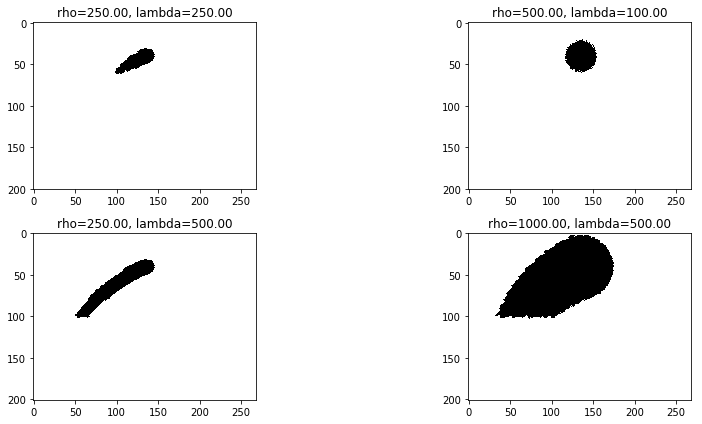

In [7]:
rho_lambda = [(250, 250), (500, 100), (250, 500), (1000, 500)]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

for (rho, lmb), ax in zip(rho_lambda, axes.ravel()):
    model._curr_map = {}
    model.fit(X, axlambda=lmb, rho=rho);
    img = model._predicts_image((_, X.loc[0, :]))
    img = p2pspatial.imgproc.get_thresholded_image(img, thresh=model.img_thresh)
    ax.imshow(1 - img, cmap='gray')
    ax.set_title('rho=%.2f, lambda=%.2f' % (rho, lmb))
fig.tight_layout()
fig.savefig('fig6-axon-map-percepts.eps')